# Gradient Descent

In this section we will be going over Gradient Descent, an important part of model building in the world of machine learning.  Gradient Descent is an optimization method that helps us create the most efficient model possible with the datasets features.  This method finds the most efficient model by minimizing a cost (aka loss) function.  Below, we will discuss this method in terms of univariate and multivariate models, as well as some potentially confounding situations.

## Univariate gradient descent

For our univariate analysis of gradient descent we will look into minimizing the cost function of a logistic regression equation that has a single input variable.  Now, logistic regression is a model that helps us classify discrete observations given various features within our dataset.  A sigmoid function (equation below) is used which utilizes a logarithmic cost function to pick an optimal decision boundary for classification (see graph titled decision boundary).  To help contextualize this topic we will create a dummy dataset that tries to predict heart disease based off a person's weight.


#### $Sigmoid Function:$ = $g(z)$ = $\frac{1}{1 + e^{-z}}$ = $\frac{e^z}{1+e^z}$

$z$ = $\sum{w_ix_i} + bias$

$w_i$ = weight for feature i

$x_i$ = value for feature i

$bias$ = Allows the activation function to be shifted to the left or right to better fit the data.  It offsets some of the function's steepness that comes from the weights.


/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


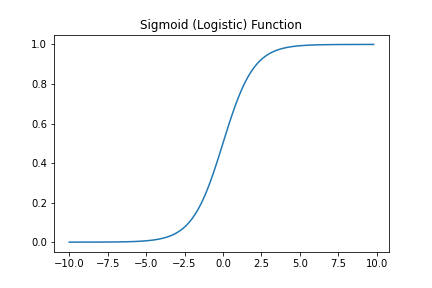

<Figure size 432x288 with 0 Axes>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)


plt.plot(x,sig)
plt.title('Sigmoid (Logistic) Function')
plt.show()

This formula represents the likelihood of observing the output $y = 1$ of a Bernoulli random variable.  It performs some tricks where all observations of your target variable are condensed onto a scale of 0 to 1.  As a feature value approaches infinity the predicted value of y will become 1 and for a feature value that approaches negative infinity y will become 0.  Now for features that are more central this function will classify them based on a decision boundary, which is optimized through a cost function.

<br>
<br>

### Decision Boundary

A decision boundary is a line that represents the probability of an observation being classified as a 1. The graphs below helps paint a clearer picture of our logistic regressions task.  Ultimately, gradient descent finds an optimal decision boundary that minimizes a cost function that we will dive into next.



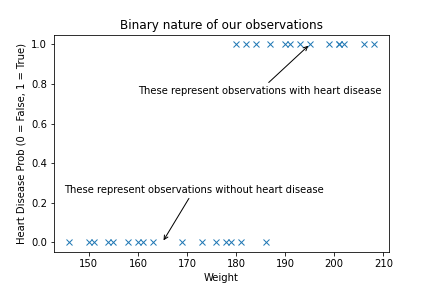

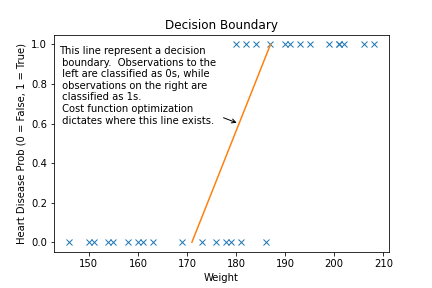

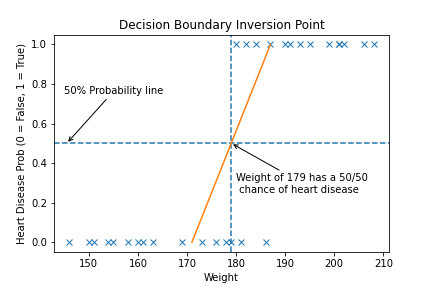

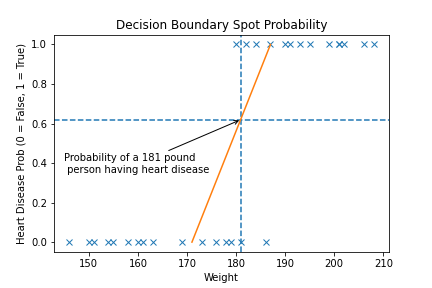

<Figure size 432x288 with 0 Axes>

In [65]:
weight = [146,150,151,154,155,158,160,161,163,169,173,176,178,179,180,181,182,184,186,187,190,191,193,195,199,201,202,206,208,201]

disease = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]

zipped = zip(weight,disease)


df = pd.DataFrame(zipped, columns = ['Weight','Disease'])


plt.plot(df['Weight'],df['Disease'], 'x')
plt.title('Binary nature of our observations')
plt.xlabel('Weight')
plt.ylabel('Heart Disease Prob (0 = False, 1 = True)')
plt.annotate('These represent observations with heart disease', xy=(195,1), xytext=(160,0.75), arrowprops = {"arrowstyle":"->", "color":"black"})
plt.annotate('These represent observations without heart disease', xy=(165,0), xytext=(145,0.25), arrowprops = {"arrowstyle":"->", "color":"black"})
plt.show()



plt.plot(df['Weight'],df['Disease'], 'x')
plt.title('Decision Boundary')
plt.xlabel('Weight')
plt.ylabel('Heart Disease Prob (0 = False, 1 = True)')

plt.plot([171,187],[0,1])
plt.annotate('This line represent a decision \n boundary.  Observations to the \n left are classified as 0s, while \n observations on the right are \n classified as 1s. \n Cost function optimization \n dictates where this line exists.', xy=(180.5,0.6), xytext=(144,0.6), arrowprops = {"arrowstyle":"->", "color":"black"})

plt.show()


plt.plot(df['Weight'],df['Disease'], 'x')
plt.title('Decision Boundary Inversion Point')
plt.xlabel('Weight')
plt.ylabel('Heart Disease Prob (0 = False, 1 = True)')
plt.axhline(0.5, linestyle = '--')
plt.axvline(179, linestyle = '--')
plt.annotate('50% Probability line', xy=(145.5,0.5), xytext=(145,0.75), arrowprops = {"arrowstyle":"->", "color":"black"})
plt.annotate('Weight of 179 has a 50/50 \n chance of heart disease', xy=(179,0.5), xytext=(180,0.25), arrowprops = {"arrowstyle":"->", "color":"black"})

plt.plot([171,187],[0,1])
plt.show()



plt.plot(df['Weight'],df['Disease'], 'x')
plt.title('Decision Boundary Spot Probability')
plt.xlabel('Weight')
plt.ylabel('Heart Disease Prob (0 = False, 1 = True)')
plt.axhline(0.62, linestyle = '--')
plt.axvline(181, linestyle = '--')


plt.annotate('Probability of a 181 pound \n person having heart disease', xy=(181,0.62), xytext=(145,0.35), arrowprops = {"arrowstyle":"->", "color":"black"})

plt.plot([171,187],[0,1])

plt.show()





### Cost Function

While difficult to interpret, the log loss function is the holy grail of probabilistic classification metrics.  The log loss function is the negative average of the log of correctly predicted probabilities for each instance of your target variable.  To better understand what this even means lets look at some graphical representations of how the model treats correctly and incorrectly classified observations.  

First lets take a look at the function we will be graphing:

#### $Cost function:$ $-\frac{1}{m}\sum^m_{i=1}[ylog(y_{pred}) + (1-y)log(1-y_{pred}]$

$y$ = actual value of target value

$m$ = number of observations in sample set

$y_{pred}$ = $\sigma(w^tx+b)$ = predicted value of target value


<br>

$y_{pred}$ returns a continous probability value of an observation being a 1.

<br>

### The binary logic of this cost function:
<br>

#### Cost function when true value of y is 0:

$y=0 | error = -\frac{1}{m}\sum^m_{i=1}[ylog(y_{pred}) + (1-y)log(1-y_{pred}] = -1*log(1-y_{pred})$

<br>

If y is equal to zero then the first part of our cost function ($0log(y_{pred})$) is equal to zero, leaving the remaining half of the equation.  The remaining part of the equal returns an error value by taking the log of $1-y_{pred}$ and multiplying it by the $-\frac{1}{m}$ from the beginning of the equation.  Now the key to understanding the magic that is happening with this remaining part lies in knowing that $log(1)$ is equal to 0.  This remaining part, for an observation whose true value is 0, and whose predicted value is close to 0, will return a smaller error term for this observation. 

Examples:
1. An observation is truly a 0.  The predicted probability of it being a 1 is 0.01.  Error term:  $-1*log(1-0.01)$ = 0.0043648054
2. An observation is truly a 0.  The predicted probability of it being a 1 is 0.99.   Error term:  $-1*log(1-0.99)$ = 2

<br>
<br>

#### Cost function when true value of y is 1:

$y=1 | error = -\frac{1}{m}\sum^m_{i=1}[ylog(y_{pred}) + (1-y)log(1-y_{pred}] = -log(1-y_{pred})$

<br>

If y is equal to one then the second part of our cost function ($(1-1)log(1-y_{pred}$) is equal to zero, leaving the first half of the equation ($ylog(y_{pred})$).  This remaining part works much the same way as the function above, just inversely.  The remaining part multiples the log of your predicted value by the true value of the class.  

Examples:
1. An observation is truly a 1.  The predicted probability of it being a 1 is 0.01.  Error term:  $-log(0.01)$ = 2
2. An observation is truly a 1.  The predicted probability of it being a 1 is 0.99.   Error term:  $-log(0.99)$ = 0.0043648054

<br>
<br>

#### The logic above reduces our cost function to the follow:




#### $Cost Function:$ $Cost(h_\theta(x),y)$ = $\begin{equation}
  \begin{cases}
    \text{$-log(h_\theta(x)) \:\:\:\:\:\:\:\:\:\:\:\:\: \text{if:} \:\: y = 1$}.\\
    \text{$-log(1 - h_\theta(x)) \:\:\:\:\: \text{if:} \:\: y = 0$}.
  \end{cases}
\end{equation}$

$h_\theta$ = probability that y = 1, given x parameterized by $\theta$

$\theta$ = vector of parameters of length m

$y$ = target variable class

Our cost function helps us demonstrate how our model is predicting compared to the original proportions of our dataset.  It can help to think of our cost function having an inverse relationship to our model's accuracy.  A model with higher accuracy will have a smaller cost function and vice versa.  Gradient descent looks to minimize the cost function by controlling the cut off point of observations being classified as either a 0 or a 1, thus giving us an optimal model.

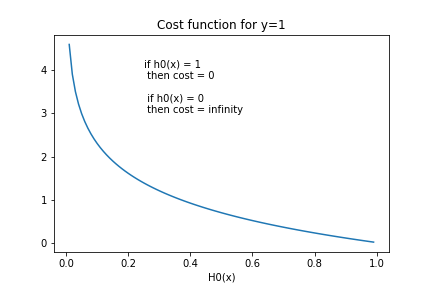

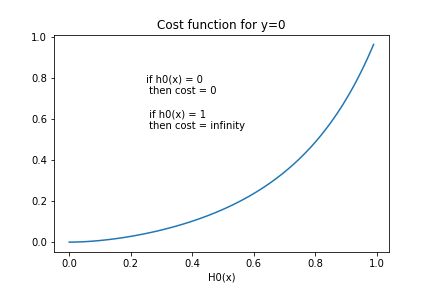

<Figure size 432x288 with 0 Axes>

In [66]:


x = np.arange(0,1,0.01)
y = [-np.log(i) for i in x]

plt.plot(x,y)
plt.title('Cost function for y=1')
plt.xlabel('H0(x)')
plt.annotate('if h0(x) = 1 \n then cost = 0 \n \n if h0(x) = 0 \n then cost = infinity', xy=(0.5, 2.5),xytext=(0.25, 3))
plt.show()

y = [ i**np.exp(i)*i for i in x]

plt.plot(x,y)
plt.title('Cost function for y=0')
plt.xlabel('H0(x)')
plt.annotate('if h0(x) = 0 \n then cost = 0 \n \n if h0(x) = 1 \n then cost = infinity', xy=(0.5, .5),xytext=(0.25, 0.55))
plt.show()




